Load the MNIST data.

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (val_images, val_labels) = mnist.load_data()

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Show a sample image

In [2]:
from matplotlib import pyplot as plt

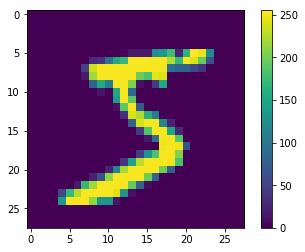

In [3]:
plt.imshow(train_images[0,:,:])
plt.colorbar()
plt.show()

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
val_images = val_images.reshape((10000, 28 * 28))
val_images = val_images.astype("float32") / 255
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [5]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Dense(128, activation="relu", input_shape=(28 * 28,)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
hist_MNIST = model.fit(train_images, train_labels, epochs=5, batch_size=64,
                       validation_data=(val_images, val_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.2883 - acc: 0.9178 - val_loss: 0.1559 - val_acc: 0.9536
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.1211 - acc: 0.9640 - val_loss: 0.1090 - val_acc: 0.9660
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0846 - acc: 0.9742 - val_loss: 0.0939 - val_acc: 0.9717
Epoch 4/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0638 - acc: 0.9805 - val_loss: 0.0864 - val_acc: 0.9745
Epoch 5/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0512 - acc: 0.9844 - val_loss: 0.0764 - val_acc: 0.9762


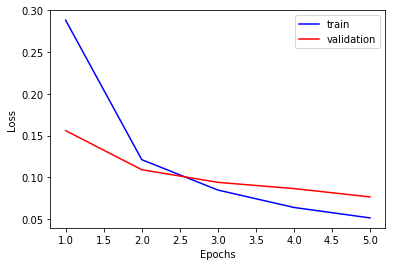

In [8]:
import matplotlib.pyplot as plt
history_dict = hist_MNIST.history
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, "b-", label="train")
plt.plot(epochs, val_loss, "r-", label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("MNIST_loss_dense.pdf")
plt.show()

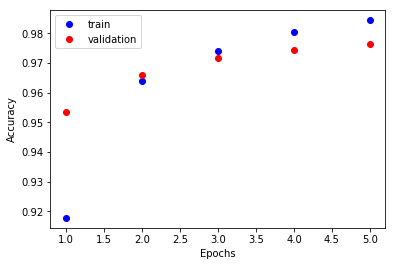

In [9]:
train_acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
plt.plot(epochs, train_acc, "bo", label="train")
plt.plot(epochs, val_acc, "ro", label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig("MNIST_accuracy_dense.pdf")
plt.show()